# 作業 : (Kaggle)鐵達尼生存預測
***
https://www.kaggle.com/c/titanic

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

data_path = 'data/'
df = pd.read_csv(data_path + 'titanic_train.csv')

train_Y = df['Survived']
df = df.drop(['PassengerId', 'Survived'] , axis=1)
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# 因為需要把類別型與數值型特徵都加入, 故使用最簡版的特徵工程
LEncoder = LabelEncoder()
MMEncoder = MinMaxScaler()
for c in df.columns:
    df[c] = df[c].fillna(-1)
    if df[c].dtype == 'object':
        df[c] = LEncoder.fit_transform(list(df[c].values))
        print("Object type: {0}".format(c))
        print("df[{0}]:{1}".format(c, df[c]))
    df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))
#print(df.head())

Object type: Name
df[Name]:0      108
1      190
2      353
3      272
4       15
5      554
6      515
7      624
8      412
9      576
10     727
11      95
12     729
13      28
14     840
15     359
16     682
17     867
18     839
19     512
20     273
21      80
22     523
23     765
24     626
25      44
26     240
27     260
28     605
29     813
      ... 
861    283
862    797
863    718
864    285
865    122
866    230
867    696
868    890
869    407
870     59
871     79
872    139
873    836
874      4
875    571
876    311
877    657
878    451
879    668
880    739
881    510
882    193
883     61
884    793
885    684
886    548
887    303
888    413
889     81
890    220
Name: Name, Length: 891, dtype: int64
Object type: Sex
df[Sex]:0      1
1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      0
9      0
10     0
11     0
12     1
13     1
14     0
15     0
16     1
17     1
18     0
19     0
20     1
21     1
22     0
23     1
24     0
25     0
26   

C:\Users\kevin_chang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [3]:
# 梯度提升樹擬合後, 將結果依照重要性由高到低排序 (note : D27作業中'Ticket'是第一名特徵, 'Age'是數值特徵中排名最高者)
estimator = GradientBoostingClassifier()
estimator.fit(df.values, train_Y)
feats = pd.Series(data=estimator.feature_importances_, index=df.columns)
feats = feats.sort_values(ascending=False)
feats

Ticket      0.215014
Name        0.178475
Age         0.176985
Fare        0.152596
Sex         0.133058
Cabin       0.069673
Pclass      0.031457
Parch       0.016798
SibSp       0.016337
Embarked    0.009606
dtype: float64

## 先用梯度提升機對鐵達尼生存預測做訓練，再用其特徵重要性回答下列問題

# 作業1
* 將特徵重要性較低的一半特徵刪除後，再做生存率預估，正確率是否有變化?

In [4]:
# 原始特徵 + 梯度提升樹
train_X = MMEncoder.fit_transform(df)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8204799511452461

In [5]:
# 高重要性特徵 + 梯度提升樹 
"""
Your Code Here
"""
high_feature = list(feats[:5].index)
train_X = MMEncoder.fit_transform(df[high_feature])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8092060499605113

# 作業2
* 將特徵重要性最高的兩個特徵做特徵組合，是否能再進一步提升預測力?

In [6]:
# 觀察重要特徵與目標的分布
# 第一名 : Ticket              
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x=df['Ticket'], y=train_Y, fit_reg=False)
plt.show()

<Figure size 640x480 with 1 Axes>

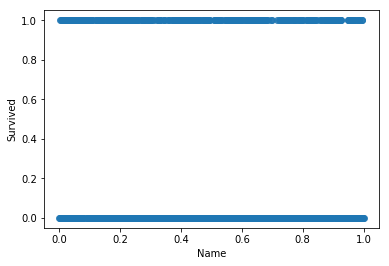

In [7]:
# 第二名 : Name        
sns.regplot(x=df['Name'], y=train_Y, fit_reg=False)
plt.show()

In [8]:
# 製作新特徵看效果
"""
Your Code Here
"""
df['Add_char'] = df['Ticket'] + df['Age']
df['Multi_char'] = df['Ticket'] * df['Age']
df['TA_div1p'] = df['Ticket'] / (df['Age']+1)
df['AT_div1p'] = df['Age'] / (df['Ticket']+1)
train_X = MMEncoder.fit_transform(df)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.818194884932798

In [9]:
# 拿掉Multi_char，因為"Ticket"和"Age"都是小於1，相乘後越小，特徵越不明顯
df['Add_char'] = df['Ticket'] + df['Age']
#df['Multi_char'] = df['Ticket'] * df['Age']
df['TA_div1p'] = df['Ticket'] / (df['Age']+1)
df['AT_div1p'] = df['Age'] / (df['Ticket']+1)
train_X = MMEncoder.fit_transform(df)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8215531173099245